In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Now we will convert the current datetime column into Machine Learning friendly format i.e Year, Month, Day, Hour.

In [3]:
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['month'] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['day'] = [t.day for t in pd.DatetimeIndex(train.datetime)]
train['hour'] = [t.hour for t in pd.DatetimeIndex(train.datetime)]

test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['month'] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['day'] = [t.day for t in pd.DatetimeIndex(test.datetime)]
test['hour'] = [t.hour for t in pd.DatetimeIndex(test.datetime)]

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In above output we can see we converted the datetime column in Machine Learning firendly format now we will drop the datetime column

In [5]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [6]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


**Data Visualisation**

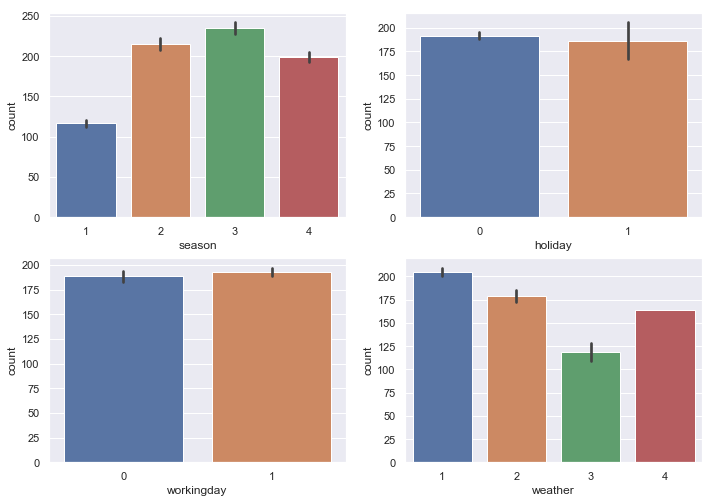

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.barplot(train['season'],train['count'],ax=ax[0,0]);
sns.barplot(train['holiday'],train['count'],ax=ax[0,1]);
sns.barplot(train['workingday'],train['count'],ax=ax[1,0]);
sns.barplot(train['weather'],train['count'],ax=ax[1,1]);

The above plots show us intuitively how count parameter differs with workingday, weather, season, holiday

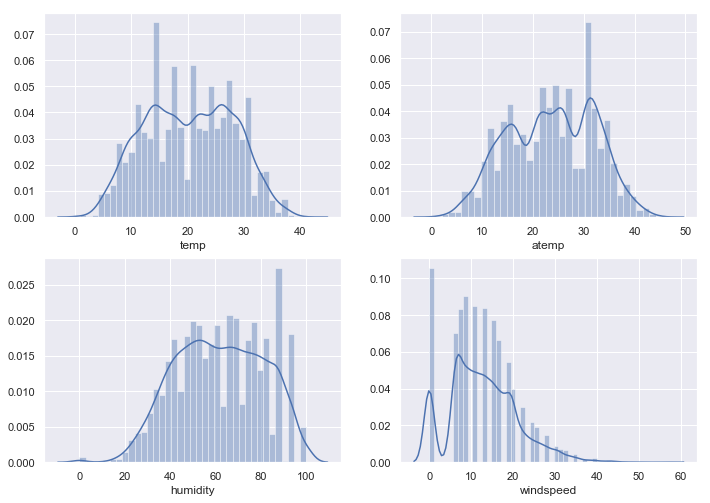

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.distplot(train['temp'],ax=ax[0,0]);
sns.distplot(train['atemp'],ax=ax[0,1]);
sns.distplot(train['humidity'],ax=ax[1,0]);
sns.distplot(train['windspeed'],ax=ax[1,1]);

This are distribution plot of humidity, windspeed, temp and atemp

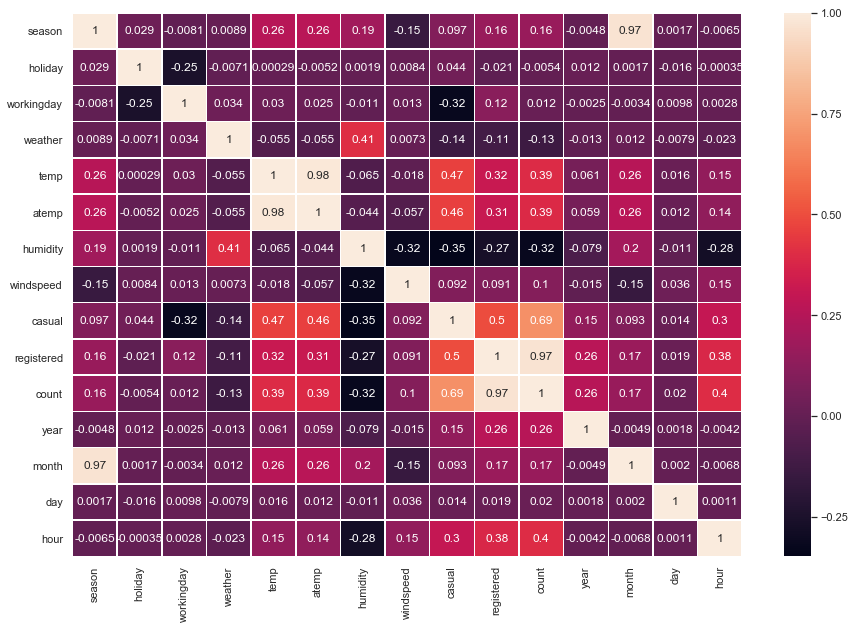

In [9]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train.corr(),annot=True,linewidths=0.5);

In [10]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [11]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


We cans see that registered/casual is highly correlated with the count which means most of the bike were registered.

In [12]:
train.drop(['casual','registered'],axis=1,inplace=True)
#test.drop(['casual','registered'],axis=1,inplace=True)

**Correlation Plot**

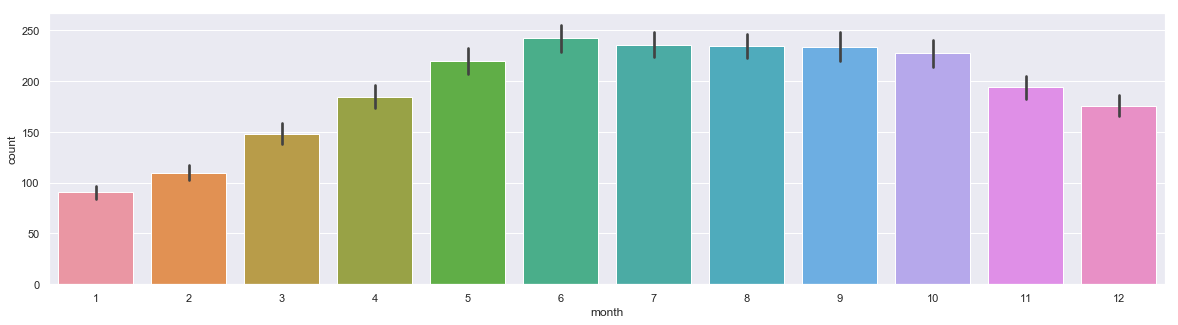

In [13]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=train['month'],y=train['count']);

The above plot explains the demand of the bicycle according to month.

**Data Transformation**

In [14]:
season = pd.get_dummies(train['season'],prefix='season')
train = pd.concat([train,season],axis=1)
season = pd.get_dummies(test['season'],prefix='season')
test = pd.concat([test,season],axis=1)

In [15]:
train.drop('season',axis=1,inplace=True)
train.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,season_1,season_2,season_3,season_4
0,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,1,0,0,0
1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,1,0,0,0
2,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,1,0,0,0
3,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,1,0,0,0
4,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,1,0,0,0


In [16]:
weather = pd.get_dummies(train['weather'],prefix='weather')

train = pd.concat([train,weather],axis=1)

train.drop('weather',axis=1,inplace=True)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,16,2011,1,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,40,2011,1,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,32,2011,1,1,2,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,13,2011,1,1,3,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,1,2011,1,1,4,1,0,0,0,1,0,0,0


In [17]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,1,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,1,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,1,0,0,0


In [18]:
test.drop('season',axis=1,inplace=True)

In [19]:
weather = pd.get_dummies(test['weather'],prefix='weather')

test = pd.concat([test,weather],axis=1)

test.drop('weather',axis=1,inplace=True)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,11.365,56,26.0027,2011,1,20,0,1,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,0.0000,2011,1,20,1,1,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,0.0000,2011,1,20,2,1,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.0014,2011,1,20,3,1,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.0014,2011,1,20,4,1,0,0,0,1,0,0,0


**Splitting data into Train and Test split**

In [20]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'year', 'month', 'day',
        'hour'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X = train.drop('count',axis=1)
y = train['count']
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
test=sc.fit_transform(test)

In [23]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error

**Model Building**

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_pred_rf))

C:\Users\akush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.35711827065893603

The above Random Forest model is using default parameter of the Random forest model to reduse RMSLE more we will do hyperparameter tuning the parameters considered are listed below

In [25]:
n_estimators = [int(x) for x in range(200,2000,100)]
max_feature = ['auto','sqrt']
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4]
max_depth = [int(x) for x in range(10,110,11)]
max_depth.append(None)

In [26]:
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_feature,
              'min_samples_leaf': min_sample_leaf,
              'min_samples_split': min_sample_split}

In [27]:
random_grid

{'n_estimators': [200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 109, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

Now we will find the optimal solution using RandomizedSearchCV, the estimator will be Random Forest and parameters will be all the parameters in random_grid

In [28]:
rf_tune = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_tune,param_distributions=random_grid,n_iter=100,cv=5,verbose= 2,n_jobs=-1)

by running **rf_random(X_train,y_train)** we will get the optimal parameter as below

* max_depth=87
* max_features='auto'
* min_samples_leaf=1
* min_samples_split=2
* n_estimators=1300

now we will make final Random forest model with hyperparameters

In [29]:
final_rf = RandomForestRegressor(max_depth=87,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1300)
final_model_rf = final_rf.fit(X_train,y_train)
y_final_pred = final_model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_final_pred))

0.34193786968989115

In [30]:
X_test=pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.171490,0.684616,1.718488,1.946484,-0.149992,-1.567754,-1.003866,0.138930,1.644787,-0.078318,-0.572329,-0.578977,1.727185,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
1,5.831228,-1.460672,-2.070386,-1.986625,-0.409811,-0.832442,0.996149,-1.603121,1.096978,-0.801330,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
2,-0.171490,-1.460672,-1.333661,-1.450292,-0.721594,0.024326,-1.003866,1.590639,0.183962,0.933897,-0.572329,-0.578977,-0.578977,1.726763,0.716677,-0.593264,-0.292692,-0.009585
3,-0.171490,0.684616,1.192256,1.231373,0.005900,0.024326,0.996149,0.429272,0.914374,-0.222921,-0.572329,-0.578977,1.727185,-0.579118,-1.395328,1.685590,-0.292692,-0.009585
4,-0.171490,0.684616,0.666023,0.873818,-0.461775,0.514260,0.996149,-0.151412,0.914374,1.656909,-0.572329,1.727185,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
5,-0.171490,-1.460672,-0.807428,-0.735182,-0.461775,-0.710164,0.996149,1.300297,-1.276863,1.367704,-0.572329,-0.578977,-0.578977,1.726763,0.716677,-0.593264,-0.292692,-0.009585
6,-0.171490,0.684616,-0.807428,-1.003643,-1.033377,0.881916,-1.003866,1.590639,1.096978,-0.078318,-0.572329,-0.578977,-0.578977,1.726763,-1.395328,1.685590,-0.292692,-0.009585
7,-0.171490,-1.460672,1.823735,1.946484,-0.461775,0.881916,-1.003866,0.138930,-1.276863,0.500091,-0.572329,-0.578977,1.727185,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
8,-0.171490,0.684616,-1.228414,-1.361199,-0.098028,0.759638,0.996149,1.300297,-0.546451,-0.512125,-0.572329,-0.578977,-0.578977,1.726763,-1.395328,1.685590,-0.292692,-0.009585
9,-0.171490,-1.460672,-0.702182,-0.735182,0.993213,0.269704,-1.003866,-1.603121,-1.459467,-0.222921,1.747245,-0.578977,-0.578977,-0.579118,-1.395328,1.685590,-0.292692,-0.009585


In [31]:
y_final=final_model_rf.predict(test)

In [32]:
y_final=pd.DataFrame(y_final)

In [33]:
y_final=y_final.round()

In [34]:
y_final=y_final.astype(int)

In [35]:
y_final.describe()

,0
count,6493.000000
mean,193.531187
std,173.424166
min,1.000000
25%,51.000000
50%,153.000000
75%,289.000000
max,901.000000


In [36]:
y_final = pd.DataFrame(y_final)
y_final.to_csv('Bike_share.csv')

In [37]:
y_final.head()

,0
0,10
1,5
2,5
3,4
4,3
